# Enhancing NYPD’s Understanding of Car Crash Trends 

Team Members:
* Lujain Alqassar
* Jon Sherman
* Yifang Harry He
* Hanyu Chen
* Mekhal Raj


## **Problem Definition**: 

Our goal is to identify the main reasons of traffic accidents around New York City, specifcially during 2020 at the peak of COVID-19. We will perform an overall analysis on the dataset to better understand where most accidents occur and what kind they are in order to help NYPD focus on where to improve safety.

## **Data Source**: 

NYC Open Data 

https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95

Kaggle

https://www.kaggle.com/mysarahmadbhat/nyc-traffic-accidents 


## Main Variables We Are Focused On:

*   Location:


> Do certain areas in NYC have higher collision rates than others?

> Associated Columns: 
 
        *   BOROUGH
        *   LATITUDE
        *   LONGITUDE
        *   LOCATION
        *   ON STREET NANE
        *   OFF STREET NAME
        *   CROSS STREET NAME


*   Date & Time:


> Are there more collisions in certain days of the year? For example, more collisions during the winter months when it is snowing and hard to drive along the streets?

> Associated Columns: 
 
        *   CRASH DATE
        *   CRASH TIME


*   Type of Vehicles:


> Are certain vehicles more prone to accidents than others? Do some cause more harm to people versus others?

> Associated Columns: 
 
        *   VEHICLE TYPE CODE 1, 2, 3, 4, AND 5



*   Type of Accidents:


> What type of accidents most occur? How can NYPD prevent some accidents from occuring?

> Associated Columns: 
 
        *   CONTRIBUTING FACTOR VEHICLE 1, 2, 3, 4 AND 5



*   People Involved:


> How often do people get injured or killed from traffic accidents in New York City?

> Associated Columns: 
 
        *   NUMBER OF PERSONS INJURED
        *   NUMBER OF PERSONS KILLED
        *   NUMBER OF PEDESTRIANS INJURED
        *   NUMBER OF PEDESTRIANS KILLED
        *   NUMBER OF CYCLISTS INJURED
        *   NUMBER OF CYCLISTS KILLED
        *   NUMBER OF MOTORISTS INJURED
        *   NUMBER OF MOTORISTS KILLED




---










## Reading the Data:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium import plugins
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(20,10)})  # Figure size
plt.style.use('seaborn-notebook')

In [2]:
#from google.colab import drive
#drive.mount('/content/gdrive', force_remount=True)

In [3]:
nyc = pd.read_csv("NYC Accidents 2020.csv")

In [4]:
#nyc = pd.read_csv("/content/gdrive/MyDrive/BA780/BA780-Team-Project/NYC_Accidents_2020.csv")

In [5]:
nyc.head()

CRASH DATE CRASH TIME   BOROUGH  ZIP CODE  LATITUDE  LONGITUDE  \
0  2020-08-29   15:40:00     BRONX   10466.0  40.89210 -73.833760   
1  2020-08-29   21:00:00  BROOKLYN   11221.0  40.69050 -73.919914   
2  2020-08-29   18:20:00       NaN       NaN  40.81650 -73.946556   
3  2020-08-29   00:00:00     BRONX   10459.0  40.82472 -73.892960   
4  2020-08-29   17:10:00  BROOKLYN   11203.0  40.64989 -73.933890   

                     LOCATION   ON STREET NAME CROSS STREET NAME  \
0   POINT (-73.83376 40.8921)     PRATT AVENUE     STRANG AVENUE   
1  POINT (-73.919914 40.6905)  BUSHWICK AVENUE   PALMETTO STREET   
2  POINT (-73.946556 40.8165)         8 AVENUE               NaN   
3  POINT (-73.89296 40.82472)              NaN               NaN   
4  POINT (-73.93389 40.64989)              NaN               NaN   

       OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 2  \
0                  NaN  ...                    Unspecified   
1                  NaN  ...                    Unspecified   
2                  NaN  ...                            NaN   
3  1047 SIMPSON STREET  ...                    Unspecified   
4   4609 SNYDER AVENUE  ...                    Unspecified   

   CONTRIBUTING FACTOR VEHICLE 3  CONTRIBUTING FACTOR VEHICLE 4  \
0                            NaN                            NaN   
1                            NaN                            NaN   
2                            NaN                            NaN   
3                    Unspecified                    Unspecified   
4                            NaN                            NaN   

   CONTRIBUTING FACTOR VEHICLE 5  COLLISION_ID  \
0                            NaN       4342908   
1                            NaN       4343555   
2                            NaN       4343142   
3                            NaN       4343588   
4                            NaN       4342953   

                   VEHICLE TYPE CODE 1                  VEHICLE TYPE CODE 2  \
0                                Sedan  Station Wagon/Sport Utility Vehicle   
1                                Sedan                                Sedan   
2  Station Wagon/Sport Utility Vehicle                                  NaN   
3  Station Wagon/Sport Utility Vehicle  Station Wagon/Sport Utility Vehicle   
4                                Sedan                                Sedan   

   VEHICLE TYPE CODE 3 VEHICLE TYPE CODE 4 VEHICLE TYPE CODE 5  
0                  NaN                 NaN                 NaN  
1                  NaN                 NaN                 NaN  
2                  NaN                 NaN                 NaN  
3                Sedan          Motorcycle                 NaN  
4                  NaN                 NaN                 NaN  

[5 rows x 29 columns]

In [6]:
nyc.describe()

ZIP CODE      LATITUDE     LONGITUDE  NUMBER OF PERSONS INJURED  \
count  49134.000000  68935.000000  68935.000000               74881.000000   
mean   10913.681585     40.689825    -73.843376                   0.366555   
std      515.069483      1.233368      2.234881                   0.726178   
min    10000.000000      0.000000    -74.253006                   0.000000   
25%    10458.000000     40.667076    -73.958680                   0.000000   
50%    11210.000000     40.716885    -73.916850                   0.000000   
75%    11354.000000     40.789445    -73.862630                   1.000000   
max    11697.000000     40.912884      0.000000                  15.000000   

       NUMBER OF PERSONS KILLED  NUMBER OF PEDESTRIANS INJURED  \
count              74881.000000                   74881.000000   
mean                   0.001923                       0.054740   
std                    0.047609                       0.237582   
min                    0.000000                       0.000000   
25%                    0.000000                       0.000000   
50%                    0.000000                       0.000000   
75%                    0.000000                       0.000000   
max                    4.000000                       6.000000   

       NUMBER OF PEDESTRIANS KILLED  NUMBER OF CYCLIST INJURED  \
count                  74881.000000               74881.000000   
mean                       0.000748                   0.043709   
std                        0.027337                   0.209737   
min                        0.000000                   0.000000   
25%                        0.000000                   0.000000   
50%                        0.000000                   0.000000   
75%                        0.000000                   0.000000   
max                        1.000000                   3.000000   

       NUMBER OF CYCLIST KILLED  NUMBER OF MOTORIST INJURED  \
count              74881.000000                74881.000000   
mean                   0.000120                    0.268105   
std                    0.010963                    0.691423   
min                    0.000000                    0.000000   
25%                    0.000000                    0.000000   
50%                    0.000000                    0.000000   
75%                    0.000000                    0.000000   
max                    1.000000                   15.000000   

       NUMBER OF MOTORIST KILLED  COLLISION_ID  
count               74881.000000  7.488100e+04  
mean                    0.001055  4.305762e+06  
std                     0.037073  2.171658e+04  
min                     0.000000  4.063247e+06  
25%                     0.000000  4.287041e+06  
50%                     0.000000  4.305812e+06  
75%                     0.000000  4.324545e+06  
max                     4.000000  4.343622e+06

In [7]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74881 entries, 0 to 74880
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     74881 non-null  object 
 1   CRASH TIME                     74881 non-null  object 
 2   BOROUGH                        49140 non-null  object 
 3   ZIP CODE                       49134 non-null  float64
 4   LATITUDE                       68935 non-null  float64
 5   LONGITUDE                      68935 non-null  float64
 6   LOCATION                       68935 non-null  object 
 7   ON STREET NAME                 55444 non-null  object 
 8   CROSS STREET NAME              35681 non-null  object 
 9   OFF STREET NAME                19437 non-null  object 
 10  NUMBER OF PERSONS INJURED      74881 non-null  int64  
 11  NUMBER OF PERSONS KILLED       74881 non-null  int64  
 12  NUMBER OF PEDESTRIANS INJURED  74881 non-null 

In our dataset we have:


*   29 columns
*   74881 observations of NYC accidents in 2020




## Data Cleaning & Preparation:

The variables that needed to be cleaned were:


1.   Vehicle Type Codes 1-5


> Mentions all types of vehicles that were involved in the collision, ranging from sedans to work trucks to scooters.


2.   Dates
3.   Number of Persons Injured & Killed
4.   Longitude and Latitude





### Vehicle Type Cleaning:

There are 5 columns for vehicle types, and it mentions all the different vehicles that were involved in the crash. There were orginally 273 different unique types, so we worked on cleaning the data and minimizing the number of unique values to make it more interpretable.

In [8]:
# Data Cleaning of the Vehicle Type Codes:

# First, we made all the words lowercase, this reduced unique values to 220 from 273:
nyc['VEHICLE TYPE CODE 1']=nyc['VEHICLE TYPE CODE 1'].str.lower()
nyc['VEHICLE TYPE CODE 2']=nyc['VEHICLE TYPE CODE 2'].str.lower()
nyc['VEHICLE TYPE CODE 3']=nyc['VEHICLE TYPE CODE 3'].str.lower()
nyc['VEHICLE TYPE CODE 4']=nyc['VEHICLE TYPE CODE 4'].str.lower()
nyc['VEHICLE TYPE CODE 5']=nyc['VEHICLE TYPE CODE 5'].str.lower()

# Second, we replaced names of vehicle types of the same type to the same name:
nyc.replace(['4 dr sedan','2 dr sedan','4dsd'], 'sedan', inplace=True)
nyc.replace(['pick rd','pk','pick up','pickup tru','pick up tr', 'pick-up tr','pickup with mounted camper', 'pick', 'pickup','pick truck'], 'pick-up truck', inplace=True)
nyc.replace(['dirt bike','motorscooter','motorbike', 'motorscoot','motor scoo'], 'motorcycle', inplace=True)
nyc.replace(['push scoot','bmw moped','moped', 'mopd','moped elec','e-bike','minibike','minicycle','e bike','e-bik'], 'bike', inplace=True)
nyc.replace(['nyc bus','short bus','blu bus','city mta b','school bus','mta bus','postal bus', 'mta'], 'bus', inplace=True)
nyc.replace(['ambulette','abulance','ambulence','ambu', 'white ambu','fdny emt','amb','nys ambula','nyc ambula','fdny ambul','gen  ambul'], 'ambulance', inplace=True)
nyc.replace(['mailtruck','usps mail','postal veh','postal car','dilevery t','delv','usps van','usps truck','usps', 'delivery v','ups truck','mail truck','delivery t','postal tru','usps posta','usps #7530','delviery', 'us postal','postal ser'], 'delivery', inplace=True)
nyc.replace('yellow cab', 'taxi', inplace=True)
nyc.replace(['fdny ems','nyc fire t','fire', 'fd truck','fdny firet','nyc fd','fdny ladde','fdny','nyc firetr','fdny engin', 'fd ladder','fire engin','fdny #226','firetruck','fdny truck','fdny fire'], 'fire truck', inplace=True)
nyc.replace(['e revel sc','electric s', 'scooter','scotter','escooter','moped scoo','gas scoote', 'razor scoo','scoot','e-scoter'],'e-scooter', inplace=True)
nyc.replace(['dump','flat bed','truck van','dump truck','freightlin','freig','freight','freight fl','freig delv', 'freight tr', 'trk','work van','dot truck','tract','18 wheeler','18 weeler','cargo truc','mta truck','tractor truck diesel','tractor truck gasoline', 'trac','tractor tr', 'tractor','box', 'box truck','flatbed','truck flat','flat rack','flatbed tr'], 'work truck', inplace=True)

# Third, we replaced the names of vehicle type codes 1-5 not in the top 15 vehicle types to 'other':
nyc.replace(['sanitation', 'street swe', 'skateboard', 'street cle', 'internatio', 'electric m', 'pallet', 'palfinger', 'ram', 'frieghtlin', 'special pu', 'e-skateboa', 'vanette', 'ems truck', 'us govt ve', 'ice cream', 'ukn', 'vehicle 2', 'suv', 'glass rack', 'commerical', 'haul for h', 'mobile', 'van/transi', 'glp050vxev', 'escovator', 'bob cat', 'toyota', 'tree cutte', 'power shov', 'uhaul', 'jetski', 'access a r', 'rds', 't630 forkl', 'skid loade', 'lma', 'frt', 'crane', 'lcom', 'itas', 'tl', 'enclosed body - nonremovable enclosure', 'sweeper', 'glnen', 'omt', 'tour bus', 'historical', 'constructi', 'cmix', 'forklift t', 'excavator', 'sprinter v', 'armored tr', 'glben', 'trailor', 'pumper tru', 'tow trk', 'federal ex', 'tank wh', 'nyc dot', 'livery omn', 'horse carr', 'comme', 'spinter va', '600aj', 'hino tank', 'buldozer', 'gov', 'mobile foo', 'gmc', 'semi-trail', 'vendor cha', 'semi trail', 'city of ne','uhaul truc', 'c1', 'carry all', 'concrete m', 'unattached', 'uhaul box', 'uhaul trai', 'transport','refrigerated van', 'tow truck / wrecker', 'lawnmower', 'armored truck', 'concrete mixer', 'unk', 'golf cart', 'garbage or refuse', 'tanker', 'swt', 'bulk agriculture', 'trailer', 'courier', 'psd', 'limo', 'multi-wheeled vehicle', 'chassis cab', 'lift boom', 'drill rig', 'pumper', 'oth', '3-door', 'stake or rack', 'beverage truck', 'front-load',  'government', 'light trai', 'john deere', 'commercial', 'cross', 'forklift', 'go kart', 'truck', 'van camper', 'open body', 'garbage tr', 'livestock rack', 'util',  'food truck', 'moving van', 'backhoe', 'unkn', 'utility ve', 'suburban', 'ut', 'cargo van', 'bucket tru', 'dot equipm', 'road sweep', 'wh ford co', 'slingshot', 'unknown', 'horse', 'fork lift', 'bobcat for', 'chevy expr', 'j1', 'gator', 'cat', 'elec. unic', '1c', 'f150xl pic', 'mechanical', 'trc', 'pedicab', 'f-250', 'fusion', 'tow truck', 'com', 'refg', 'chevrolet', 'hrse', 'enclosed body - removable enclosure', '0', 'back hoe', 'camper tra', 'ems', 'ford sprin', 'subn whi', 'lcomm', 'e skate bo', 'motorized home', 'pc', 'utility.', 'escavator', 'p/sh', 'trl', 'lunch wagon', 'omr', 'tow', 'ford econo', 'horse trai', 'utility', 'trail', 'hearse', 'self insur', 'ford van', 'com trans', 'h1', 'g com', 'piggy back', 'orion', 'tr', 'lit direct', 'backh', 'hopper', 'utility tr', 'se', 'nat grid t', 'bobcat', 'snow plow', 'd/v wb', 'esu rescue', 'tr-trailer', 'city', 'emergency', 'oms', 'tank'], 'other', inplace=True)

### Date Cleaning and Prepping:

The crash date column in our dataset was of type 'object', so we changed that to a date type in order to better use it and manipulate it.

In [9]:
# Date Cleanup: 

# Transformed the Crash Date column to a Date Type column so we can better analyze it:
nyc['DATE'] =  pd.to_datetime(nyc['CRASH DATE'], format= '')
nyc['DAY OF THE WEEK'] = nyc['DATE'].dt.day_name() 
nyc['WEEKEND'] = ((pd.DatetimeIndex(nyc['DATE']).dayofweek) //5 == 1).astype(int)

# Set Date as Index:
nyc = nyc.set_index('DATE')

### Number of Persons Involved Cleaning:

After analyzing our data, we found out that the columns Number of Persons Injured and Number of Persons Killed involved all people involved in the accident, such as pedestrians, cyclists, and motorists. We wanted to create a column that includes all people that were involved, whether they were injured or killed in the accident.

In [10]:
# Adding a column of 'NUMBER OF PERSONS INVOLVED' (Number of persons injured + Number of persons killed):
nyc['NUMBER OF PERSONS INVOLVED']=nyc['NUMBER OF PERSONS INJURED']+ nyc['NUMBER OF PERSONS KILLED']

In [11]:
# Create a new column for Total Death
nyc['TOTAL DEATH'] = nyc['NUMBER OF PERSONS KILLED'] + nyc['NUMBER OF PEDESTRIANS KILLED'] 
+ nyc['NUMBER OF CYCLIST KILLED'] + nyc['NUMBER OF MOTORIST KILLED']

DATE
2020-08-29    0
2020-08-29    0
2020-08-29    0
2020-08-29    0
2020-08-29    0
             ..
2020-01-01    0
2020-01-01    0
2020-01-01    0
2020-01-01    0
2020-01-01    0
Length: 74881, dtype: int64

In [12]:
nyc['TOTAL INJURED'] = nyc['NUMBER OF PERSONS INJURED'] + nyc['NUMBER OF PEDESTRIANS INJURED'] + nyc['NUMBER OF CYCLIST INJURED'] + nyc['NUMBER OF MOTORIST INJURED']
nyc['TOTAL INJURED']

DATE
2020-08-29    0
2020-08-29    4
2020-08-29    2
2020-08-29    0
2020-08-29    0
             ..
2020-01-01    0
2020-01-01    0
2020-01-01    0
2020-01-01    0
2020-01-01    4
Name: TOTAL INJURED, Length: 74881, dtype: int64

### Location Cleaning

In the longitude and latitude columns, we saw there were null values, so we replaced them with 'N' for now, which we will later drop when analyzing those columns.

In [13]:
# Filling in null values in 'Longitude' and 'Latitude':
nyc1=nyc[['LATITUDE','LONGITUDE']]
#nyc1=nyc1.fillna('N')

In [14]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 74881 entries, 2020-08-29 to 2020-01-01
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     74881 non-null  object 
 1   CRASH TIME                     74881 non-null  object 
 2   BOROUGH                        49140 non-null  object 
 3   ZIP CODE                       49134 non-null  float64
 4   LATITUDE                       68935 non-null  float64
 5   LONGITUDE                      68935 non-null  float64
 6   LOCATION                       68935 non-null  object 
 7   ON STREET NAME                 55444 non-null  object 
 8   CROSS STREET NAME              35681 non-null  object 
 9   OFF STREET NAME                19437 non-null  object 
 10  NUMBER OF PERSONS INJURED      74881 non-null  int64  
 11  NUMBER OF PERSONS KILLED       74881 non-null  int64  
 12  NUMBER OF PEDESTRIANS INJURED

When we ran the .info() again, we could see all the addiitonal columns that we added ('DAY OF THE WEEK', 'WEEKEND', 'NUMBERS OF PERSONS INVOLVED', 'TOTAL DEATH', and 'TOTAL INJURED') that we will further explore in the coming sections.

## Data Exploration:

### Overview of Vehicle Types Involved in Accidents Across NYC:

Which vehicles were most involved in accidents throughout NYC?

In [15]:
#Checking the number of unique vehicles types in each of the 5 vehicle type code columns:

#Vehicle Type Code 1:
nyc_uniq_v1 = list(nyc['VEHICLE TYPE CODE 1'].unique())
print(len(nyc_uniq_v1))
print(nyc_uniq_v1)

#Vehicle Type Code 2:
nyc_uniq_v2 = list(nyc['VEHICLE TYPE CODE 2'].unique())
print(len(nyc_uniq_v2))
print(nyc_uniq_v2)

#Vehicle Type Code 3:
nyc_uniq_v3 = list(nyc['VEHICLE TYPE CODE 3'].unique())
print(len(nyc_uniq_v3))
print(nyc_uniq_v3)

#Vehicle Type Code 4:
nyc_uniq_v4 = list(nyc['VEHICLE TYPE CODE 4'].unique())
print(len(nyc_uniq_v4))
print(nyc_uniq_v4)

#Vehicle Type Code 5:
nyc_uniq_v5 = list(nyc['VEHICLE TYPE CODE 5'].unique())
print(len(nyc_uniq_v5))
print(nyc_uniq_v5)

16
['sedan', 'station wagon/sport utility vehicle', 'bus', 'pick-up truck', 'work truck', 'taxi', 'bike', 'convertible', nan, 'motorcycle', 'ambulance', 'other', 'e-scooter', 'van', 'fire truck', 'delivery']
16
['station wagon/sport utility vehicle', 'sedan', nan, 'motorcycle', 'bike', 'taxi', 'work truck', 'pick-up truck', 'other', 'bus', 'van', 'e-scooter', 'fire truck', 'ambulance', 'convertible', 'delivery']
15
[nan, 'sedan', 'station wagon/sport utility vehicle', 'van', 'pick-up truck', 'motorcycle', 'work truck', 'bike', 'taxi', 'other', 'convertible', 'bus', 'ambulance', 'e-scooter', 'fire truck']
14
[nan, 'motorcycle', 'pick-up truck', 'station wagon/sport utility vehicle', 'sedan', 'work truck', 'convertible', 'bike', 'other', 'taxi', 'bus', 'van', 'e-scooter', 'fire truck']
11
[nan, 'pick-up truck', 'station wagon/sport utility vehicle', 'motorcycle', 'sedan', 'work truck', 'convertible', 'van', 'taxi', 'e-scooter', 'bus']


We can see that now we have at most we have 15 unique types of vehicles, not including the rows with null values.

Not every column has the same number of unique values, so before we are able to combine them, we added rows to make the 5 columns all of uniform length.

In [16]:
# Total count of vehicle types:

# Created individual dataframes of the count for each of the 5 vehicle type code columns:
nycv1 = nyc.groupby(['VEHICLE TYPE CODE 1'], as_index=False).agg(COUNT = ('VEHICLE TYPE CODE 1','count'))
nycv1 = nycv1.sort_values('COUNT', ascending=False)

nycv2 = nyc.groupby(['VEHICLE TYPE CODE 2'], as_index=False).agg(COUNT = ('VEHICLE TYPE CODE 2','count'))
nycv2 = nycv2.sort_values('COUNT', ascending=False)

nycv3 = nyc.groupby(['VEHICLE TYPE CODE 3'], as_index=False).agg(COUNT = ('VEHICLE TYPE CODE 3','count'))
nycv3 = nycv3.sort_values('COUNT', ascending=False)

nycv4 = nyc.groupby(['VEHICLE TYPE CODE 4'], as_index=False).agg(COUNT = ('VEHICLE TYPE CODE 4','count'))
nycv4 = nycv4.sort_values('COUNT', ascending=False)

nycv5 = nyc.groupby(['VEHICLE TYPE CODE 5'], as_index=False).agg(COUNT = ('VEHICLE TYPE CODE 5','count'))
nycv5 = nycv5.sort_values('COUNT', ascending=False)

In [17]:
# Added missing rows to the previously created dataframes to make all them equal in length:
nycv3.loc[len(nycv3.index)]=['delivery', 0]

nycv4.loc[len(nycv4.index)]=['delivery', 0]
nycv4.loc[len(nycv4.index)]=['ambulance', 0]

nycv5.loc[len(nycv5.index)]=['delivery', 0]
nycv5.loc[len(nycv5.index)]=['ambulance', 0]
nycv5.loc[len(nycv5.index)]=['bike', 0]
nycv5.loc[len(nycv5.index)]=['other', 0]
nycv5.loc[len(nycv5.index)]=['fire truck', 0]

Next, we merged all of our 5 dataframes together to get one full dataframe of the total number of vehicles involved and their type.

In [18]:
# Merged all the 5 dataframes together to create one dataframe that includes all involved vehicles and their count:
nycmerge1 = nycv1.merge(nycv2, left_on='VEHICLE TYPE CODE 1', right_on='VEHICLE TYPE CODE 2', suffixes=('_1','_2'))
nycmerge2 = nycmerge1.merge(nycv3, left_on='VEHICLE TYPE CODE 1', right_on='VEHICLE TYPE CODE 3') 
nycmerge3 = nycmerge2.merge(nycv4, left_on='VEHICLE TYPE CODE 1', right_on='VEHICLE TYPE CODE 4', suffixes=('_3','_4')) 
nycmerge4 = nycmerge3.merge(nycv5, left_on='VEHICLE TYPE CODE 1', right_on='VEHICLE TYPE CODE 5') 

nycmerge4['Count'] = nycmerge4['COUNT_1']+nycmerge4['COUNT_2']+nycmerge4['COUNT_3']+nycmerge4['COUNT_4']+nycmerge4['COUNT']
nyc_vehicle_merge = nycmerge4[['VEHICLE TYPE CODE 1','Count']]
nyc_vehicle_merge = nyc_vehicle_merge.rename(columns={'VEHICLE TYPE CODE 1':'Vehicle Type'}).sort_values('Count', ascending=False)

nyc_vehicle_merge

Vehicle Type  Count
0                                 sedan  61791
1   station wagon/sport utility vehicle  49804
3                            work truck   5228
2                                  taxi   4597
4                         pick-up truck   3942
5                                  bike   3903
6                                   bus   1896
7                                 other   1538
8                            motorcycle   1186
10                                  van    861
9                             ambulance    648
11                            e-scooter    618
12                          convertible    389
13                           fire truck    113
14                             delivery     68

Not surprisingly, we see that the vehicles that were involved in the most accidents were sedans and station wagon/sport utility vehicle, since they account for most of the cars on the streets. 

However, we also see that work trucks were the third type of vehicle that got in the most accidents, which could be because of the size of the vehicles they drive and how hard it is to navigate them in times, especially in narrow streets like in New York City.

#### Vehicle Type Visualization:

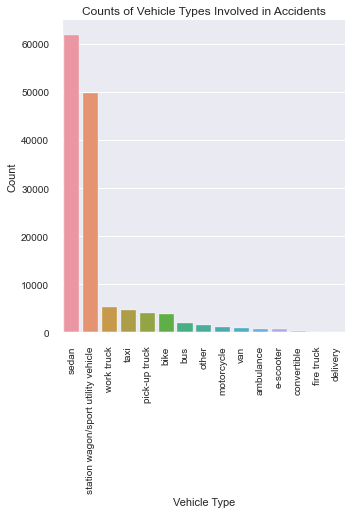

In [19]:
sns.catplot(x='Vehicle Type', y='Count', data = nyc_vehicle_merge, kind='bar')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.title('Counts of Vehicle Types Involved in Accidents')
plt.xticks(rotation=90);

In the graph, we can see the distribution of the type of vehicles involved in accidents in NYC.

### Overview of Persons Involved:

How many people were injured or killed in NYC during the year 2020 becuase of traffic accidents?

In [20]:
Totals=[
        nyc['NUMBER OF PEDESTRIANS INJURED'].sum(),
        nyc['NUMBER OF PEDESTRIANS KILLED'].sum(),
        nyc['NUMBER OF CYCLIST INJURED'].sum(),
        nyc['NUMBER OF CYCLIST KILLED'].sum(),
        nyc['NUMBER OF MOTORIST INJURED'].sum(),
        nyc['NUMBER OF MOTORIST KILLED'].sum()]

A={'Type':['NUMBER OF PEDESTRIANS INJURED','NUMBER OF PEDESTRIANS KILLED',
'NUMBER OF CYCLIST INJURED','NUMBER OF CYCLIST KILLED',
'NUMBER OF MOTORIST INJURED','NUMBER OF MOTORIST KILLED'],
    'Totals':[4099, 56, 3273, 9, 20076, 79]}

nyc_People_Sum=pd.DataFrame(A)
nyc_People_Sum.sort_values('Totals',ascending=False)

Type  Totals
4     NUMBER OF MOTORIST INJURED   20076
0  NUMBER OF PEDESTRIANS INJURED    4099
2      NUMBER OF CYCLIST INJURED    3273
5      NUMBER OF MOTORIST KILLED      79
1   NUMBER OF PEDESTRIANS KILLED      56
3       NUMBER OF CYCLIST KILLED       9

From the table, we can see that accidents involving motorists has the highest number of injured people among all other types of accidents.

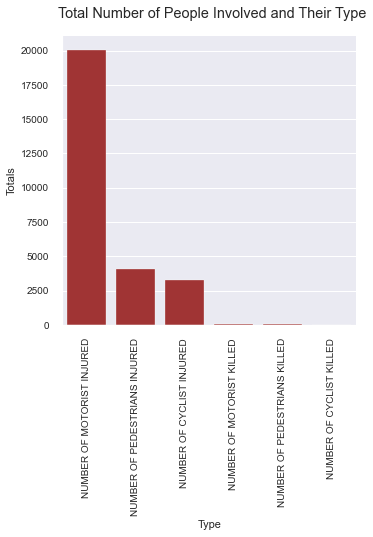

In [21]:
category_order = ['NUMBER OF MOTORIST INJURED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF CYCLIST INJURED', 
                  'NUMBER OF MOTORIST KILLED', 'NUMBER OF PEDESTRIANS KILLED','NUMBER OF CYCLIST KILLED']
g = sns.catplot(x='Type',y='Totals',data=nyc_People_Sum,kind='bar',aspect=1.8,order=category_order,color='firebrick')
g.set_xticklabels(rotation=90)
g.fig.subplots_adjust(top=0.9, right=0.9)
g.fig.suptitle("Total Number of People Involved and Their Type")
g.fig.set_size_inches(5,5)

In [22]:
## Total Number of persons that were injured or killed:
Total_Involved={'Type':['Total Injured','Total Killed'],
                'Total':[nyc['NUMBER OF PERSONS INJURED'].sum(),
                 nyc['NUMBER OF PERSONS KILLED'].sum()]}
Total_Involved=pd.DataFrame(Total_Involved)
Total_Involved

Type  Total
0  Total Injured  27448
1   Total Killed    144

### Overview of Crashes Over Time :

Which days and times do most accidents occur during? How many people get injured or killed throughout the different days and months?

In [23]:
nyc['Hour']=nyc['CRASH TIME'].apply(lambda x: int(x[0:2]))
nyc['Hour'].value_counts().head(5)

16    5219
14    5016
17    4974
18    4696
15    4677
Name: Hour, dtype: int64

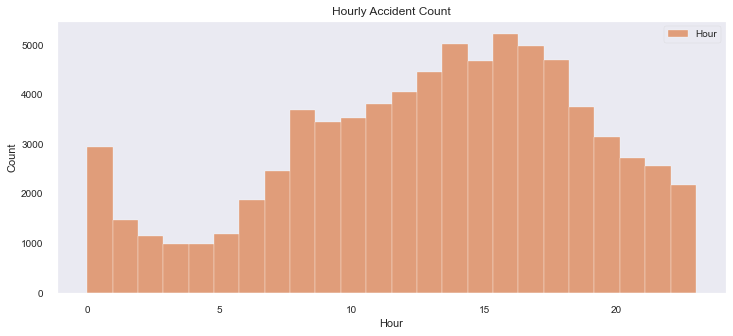

In [24]:
fig, ax = plt.subplots(figsize=(12,5))
sns.histplot(nyc['Hour'], label='Hour', ax=ax, color='C1',bins=24)
ax.set(title="Hourly Accident Count")
ax.legend()
ax.grid()
plt.show()

We wanted to see which hours in the day most crashes occur during in New York City. Not surprisingly, we see that most crashes occur in the afternoon from 4pm-7pm approximately, which is when most people get out of work.

In [25]:
nyc['Month']=nyc['CRASH DATE'].apply(lambda x: int(x[5:7]))
nyc['Month'].value_counts()

1    14287
2    13684
3    11057
7     9225
8     8747
6     7616
5     6149
4     4116
Name: Month, dtype: int64

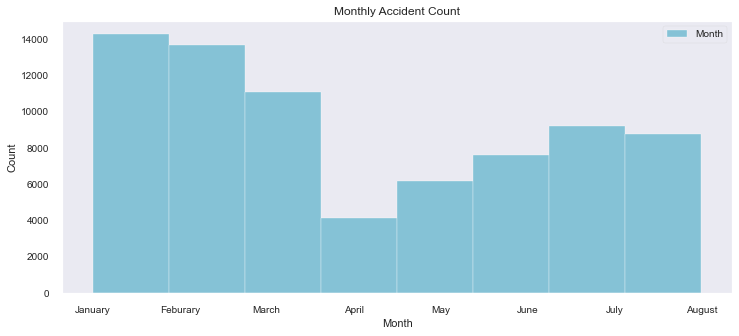

In [26]:
month = ['1' ,'January', 'Feburary', 'March', 'April', 'May', 'June', 'July', 'August']

fig, ax = plt.subplots(figsize=(12,5))
sns.histplot(nyc['Month'], label='Month', ax=ax, color='C9',bins=8)
ax.set_xticklabels(month)
ax.set(title="Monthly Accident Count")
plt.legend()
plt.grid()
plt.show()

Also, we decided to look at the count of crashes throughout the year 2020. We can see that there was a huge dip in April, when the lockdown for COVID-19 was at its peak, and then the rate climbing higher during the summer, when lockdowns were getting lifted. Given that the data we have is only for the first 8 months of 2020, more data is needed to better analyze crashes throughout the year. However, this graph is useful in helping us understand the effect lockdown and COVID-19 had on car crashes in NYC.

#### Injuries & Death throughout the Days of the Week:

In [27]:
## Number of Persons Involved with Day of the Week
Person_Week=pd.DataFrame(nyc.groupby(['DAY OF THE WEEK'])
.agg({'NUMBER OF PERSONS INVOLVED':sum})).reset_index().sort_values('NUMBER OF PERSONS INVOLVED',ascending=False)

Person_Week

DAY OF THE WEEK  NUMBER OF PERSONS INVOLVED
2        Saturday                        4218
0          Friday                        4210
4        Thursday                        4073
5         Tuesday                        3808
6       Wednesday                        3783
3          Sunday                        3780
1          Monday                        3720

In [28]:
import plotly.express as px
df = px.data.tips()
fig = px.pie(Person_Week, values='NUMBER OF PERSONS INVOLVED', names='DAY OF THE WEEK',title='Pie Chart of Persons Involved per Weekday', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

We can see that the days with the most people involved in car accidents were days that people tend to go out more such as Saturday, Friday, and Thursday.

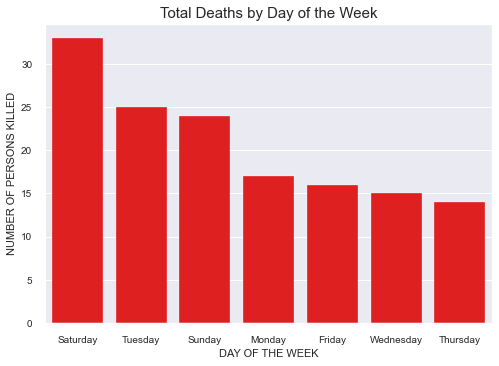

In [29]:
Day_of_Week = nyc.groupby("DAY OF THE WEEK").sum()
Day_of_Week= Day_of_Week.sort_values('NUMBER OF PERSONS KILLED', ascending=False)
ax = sns.barplot( data= Day_of_Week, x= Day_of_Week.index, y = 'NUMBER OF PERSONS KILLED', color='red')
plt.title('Total Deaths by Day of the Week', fontsize=15)
plt.show()

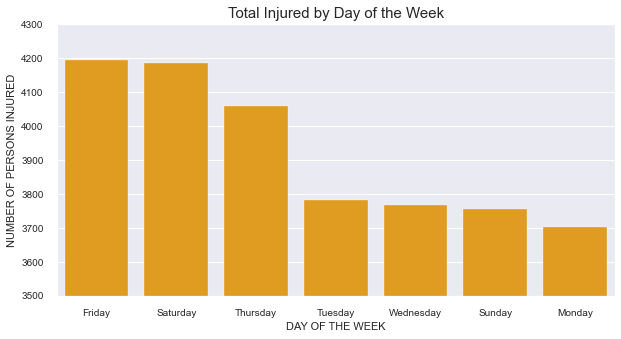

In [30]:
Day_of_Week= Day_of_Week.sort_values('NUMBER OF PERSONS INJURED', ascending=False)
fig, ax= plt.subplots(figsize=(10, 5))
ax2 = sns.barplot( data= Day_of_Week, x= Day_of_Week.index, y = 'NUMBER OF PERSONS INJURED', color='orange')
ax2.set(ylim=(3500, 4300))
plt.title('Total Injured by Day of the Week', fontsize=15)
plt.show()

From the graphs, we can see that Saturday is the deadliest day of the week, it falls slightly behind Friday on injuries. 

Also, oddly we see that Tuesday is ranked 2nd of deadliest days of the week in car accidents, might have been some outlier that occured during some Tuesday. 

##### Comparing Weekend vs Weekday Rates of Injuries and Deaths by Type:


As expected , the weekend ranks double in deaths per day as 15% more injuries per day as well. 

In [31]:
Weekends = nyc[[ 'WEEKEND','NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'NUMBER OF PEDESTRIANS INJURED','NUMBER OF PEDESTRIANS KILLED',]]
Weekends = Weekends.groupby("WEEKEND").sum()/Weekends.groupby("WEEKEND").count()
Weekends

NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
WEEKEND                                                        
0                         0.352895                  0.001574   
1                         0.405070                  0.002908   

         NUMBER OF CYCLIST INJURED  NUMBER OF CYCLIST KILLED  \
WEEKEND                                                        
0                         0.043237                  0.000145   
1                         0.045042                  0.000051   

         NUMBER OF MOTORIST INJURED  NUMBER OF MOTORIST KILLED  \
WEEKEND                                                          
0                          0.252655                   0.000687   
1                          0.311671                   0.002091   

         NUMBER OF PEDESTRIANS INJURED  NUMBER OF PEDESTRIANS KILLED  
WEEKEND                                                               
0                             0.057004                      0.000742  
1                             0.048357                      0.000765

#### Injury Counts throughout the Year:

We also investigated the total injuries by month and half-month to see how crashes transitioned throughout time.

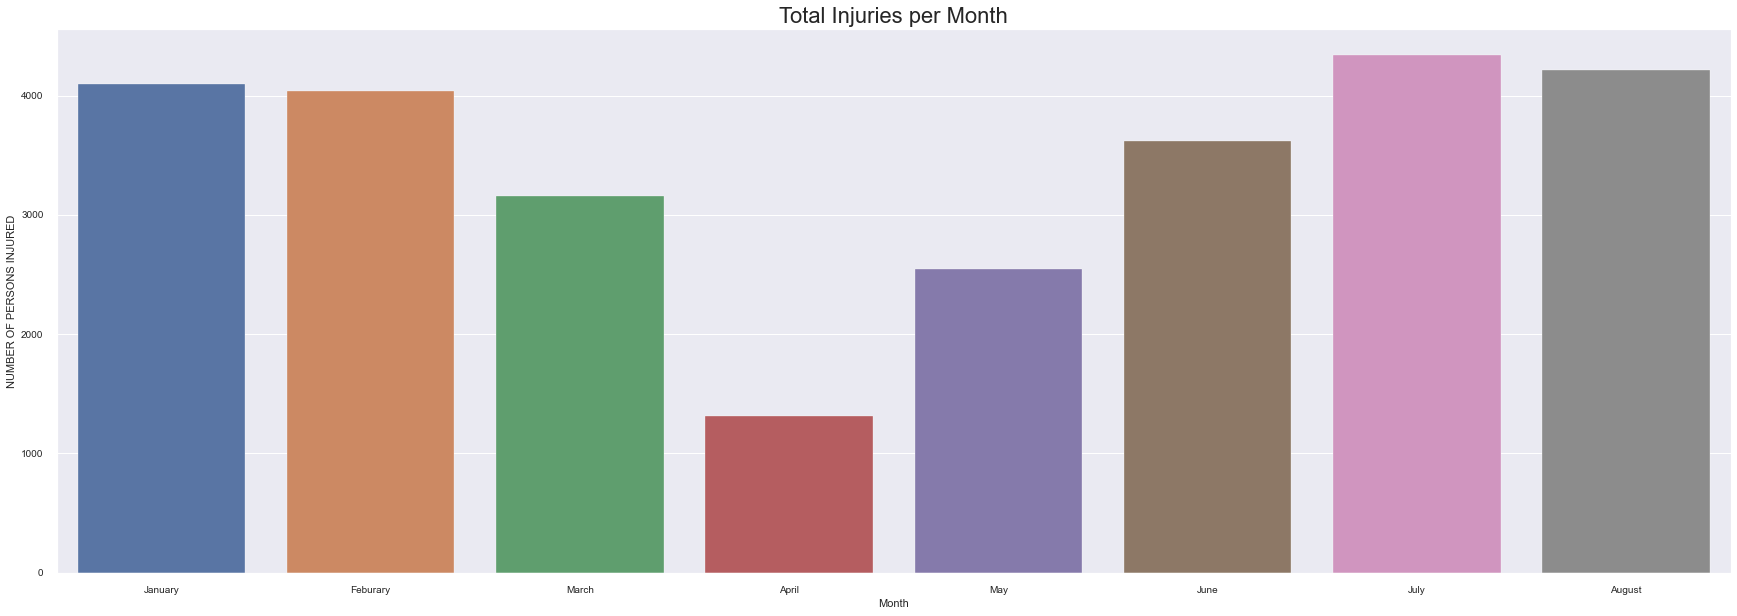

In [32]:
monthly_crashes = nyc['2020-08-29':'2020-01-01']
monthly_crashes = monthly_crashes.resample('M').sum()
month = ['January', "Feburary", 'March', 'April', 'May', 'June', 'July', 'August']
monthly_crashes = nyc['2020-08-29':'2020-01-01']
monthly_crashes = monthly_crashes.resample('M').sum()
fig, ax= plt.subplots(figsize=(30, 10))
sns.barplot(x=monthly_crashes.index, y= "NUMBER OF PERSONS INJURED", data = monthly_crashes)
plt.xlabel('Month')
ax.set_xticklabels(month)
plt.title('Total Injuries per Month', fontsize=22)
plt.show();

Since this data is from 2020, we assume the large dip is due to the COVID-19 lockdown. 

But, we can also see that summer months account for slightly more injuries than the winter months. 

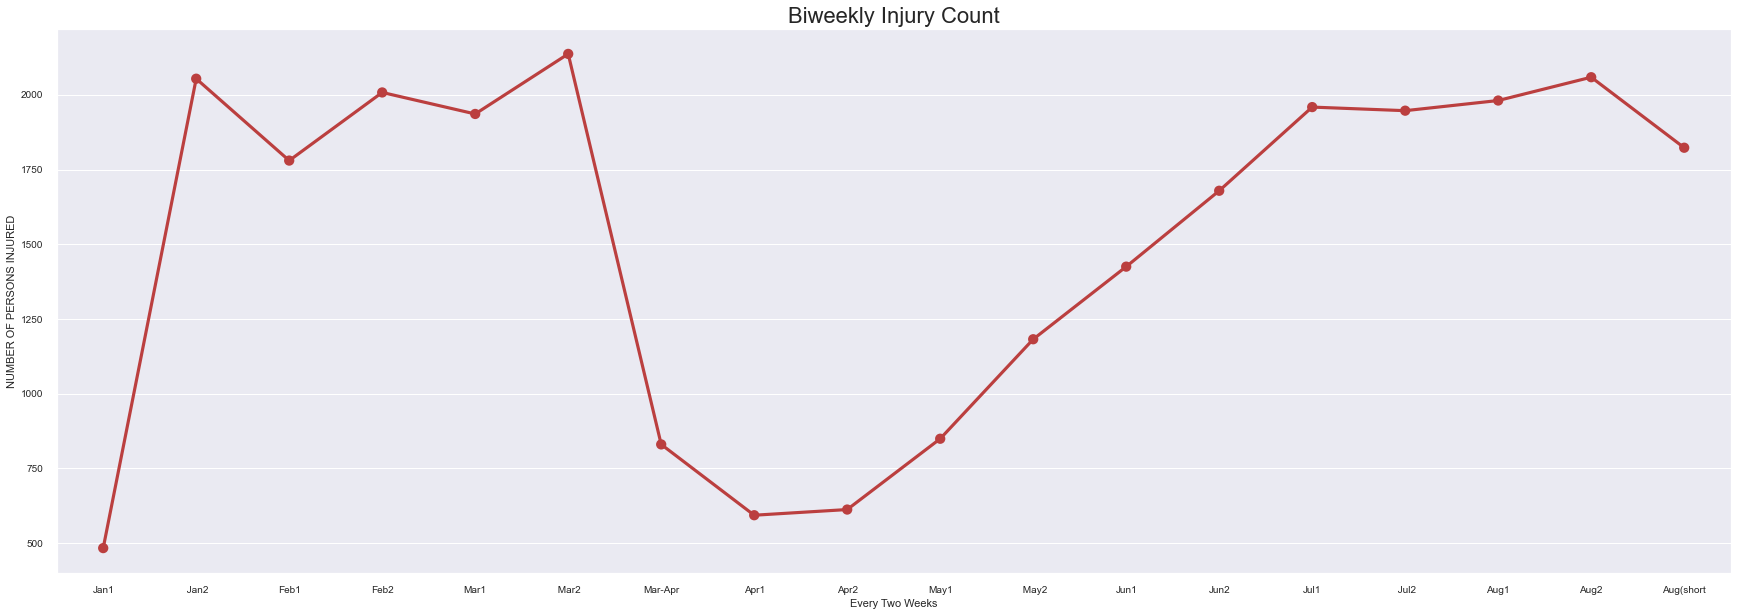

In [33]:
half_month_crashes = nyc['2020-08-29':'2020-01-01']
half_month_crashes = half_month_crashes.resample('2W').sum()
fig, ax= plt.subplots(figsize=(30, 10))
sns.pointplot(x=half_month_crashes.index, y = "NUMBER OF PERSONS INJURED", data= half_month_crashes, kind = 'line',color="#bb3f3f", aspect = 5)
plt.title('Biweekly Injury Count', fontsize=22)
plt.xlabel('Every Two Weeks')
month = ['Jan1',' Jan2', "Feb1", 'Feb2', 'Mar1',' Mar2', "Mar-Apr","Apr1", 'Apr2','May1',' May2', "Jun1", 'Jun2','Jul1',' Jul2', "Aug1", 'Aug2', "Aug(short"]
ax.set_xticklabels(month)
plt.show();

Additionally, it is intresting to see that each month seems to climb in number of injuries when comparing the first half to the second half. 

Could this be becaue people go out more toward the end of the month after they get their pay checks? Possibly. 

#### Cyclist vs. Motorist Accidents throughout the Year:


This section shows daily injury counts overall and by type of person injured, whether it was a cyclist or a motorist.

In [34]:
daily_sums = nyc['2020-08-29':'2020-01-01']
daily_sums = daily_sums.resample('d').sum()

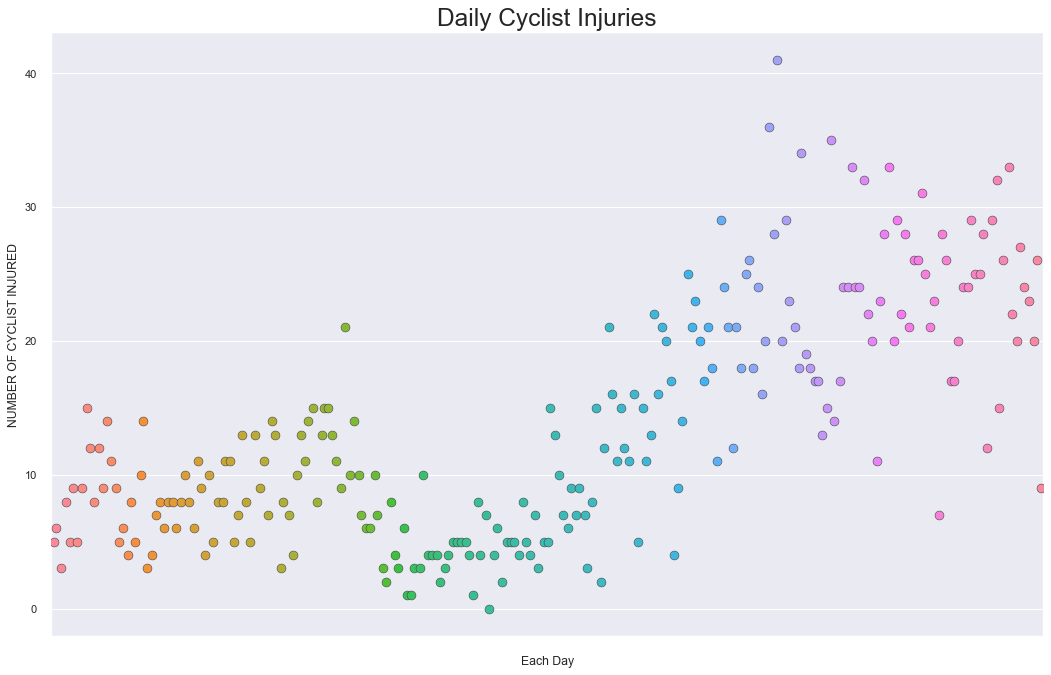

In [35]:
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(data= daily_sums, x = daily_sums.index, y = 'NUMBER OF CYCLIST INJURED', jitter=0.25, size=8, ax=ax, linewidth=.5)
plt.title('Daily Cyclist Injuries', fontsize=22)
plt.xlabel('Each Day')
ax.axes.xaxis.set_ticklabels([])
plt.show()

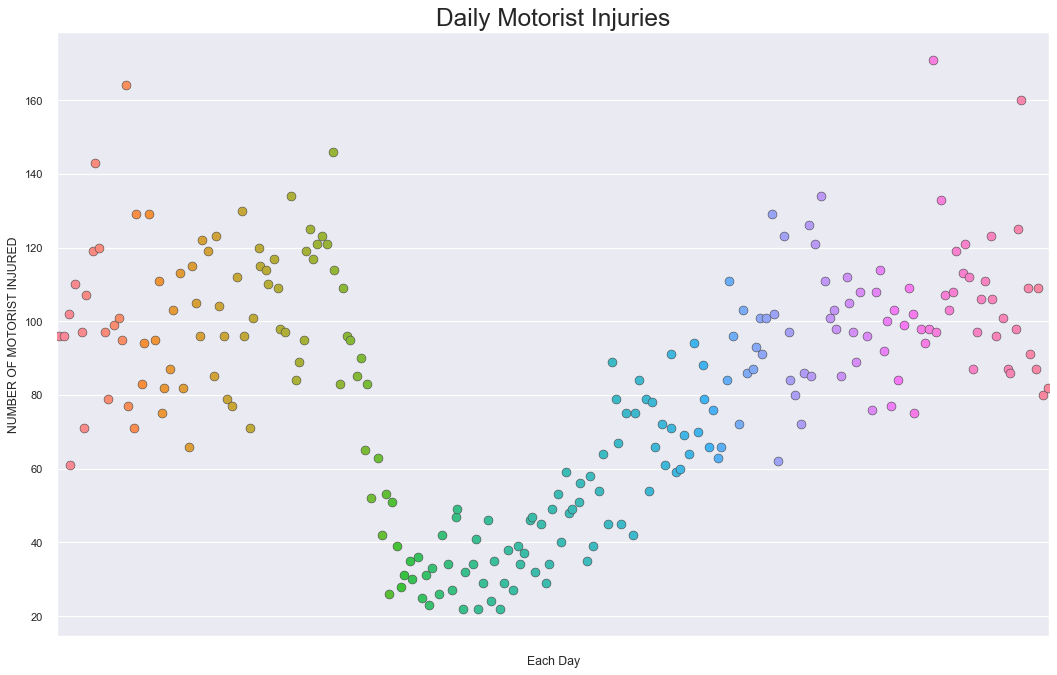

In [36]:
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(data= daily_sums, x = daily_sums.index, y = 'NUMBER OF MOTORIST INJURED', jitter=0.5, size=8, ax=ax, linewidth=.5)
plt.title('Daily Motorist Injuries', fontsize=22)
plt.xlabel('Each Day')
ax.axes.xaxis.set_ticklabels([])
plt.show()

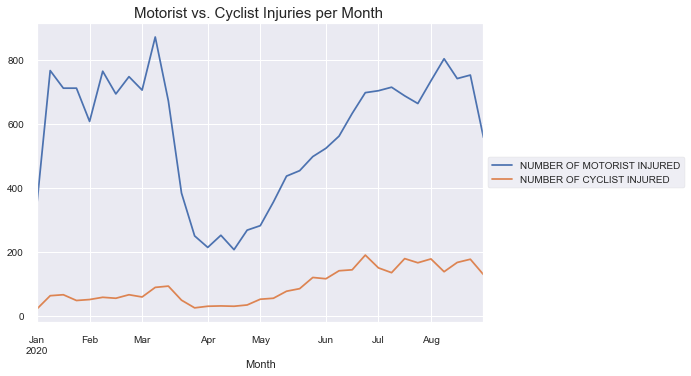

In [37]:
monthly_crashes = nyc['2020-08-29':'2020-01-01']
monthly_crashes = monthly_crashes.resample('W').sum()
monthly_crashes.reset_index(level=0, inplace=True)
monthly_crashes.head()



ax = monthly_crashes.plot(x='DATE', y=['NUMBER OF MOTORIST INJURED', 'NUMBER OF CYCLIST INJURED'], kind="line")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Motorist vs. Cyclist Injuries per Month ', fontsize=15)
plt.xlabel('Month')
plt.show();

Comparing cyclist injuries vs motorist injuries on the weekly trend shows how motorists at their peak stay consistent. 

As expected, in the warmer months, cyclist injuries increase when people are more likely motivated to bike.

###  Overview on the Location of Accidents:

Where in NYC do most accidents occur? Are some locations more prone to accidents than others?

In order to use the Longiture and Latitude columns accurately, we decided to drop the observations where there were null values.

In [38]:
nyc2 = nyc1.dropna().reset_index(drop=True)
nyc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68935 entries, 0 to 68934
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LATITUDE   68935 non-null  float64
 1   LONGITUDE  68935 non-null  float64
dtypes: float64(2)
memory usage: 1.1 MB


#### Heat Map Visualization:

We were able to use a heatmap to visualize the areas where most accidents occur, with more accidents being more red than others.

In [39]:
# Mapping the accidents on a NYC map:
eq_map = folium.Map(location=[40.7,-73.9],tiles='Stamen Terrain',zoom_start=8,min_zoom=2.0)
eq_map.add_child(plugins.HeatMap(nyc2))
eq_map

####  Count of Accidents in each of the New York City Boroughs:

In [40]:
borough = nyc['BOROUGH'].value_counts()
borough = borough.to_frame().reset_index()
borough.rename(columns={"index": "BOROUGH", "BOROUGH": "Accident Counts"},inplace =True)
borough

BOROUGH  Accident Counts
0       BROOKLYN            16907
1         QUEENS            14017
2          BRONX             9417
3      MANHATTAN             7353
4  STATEN ISLAND             1446

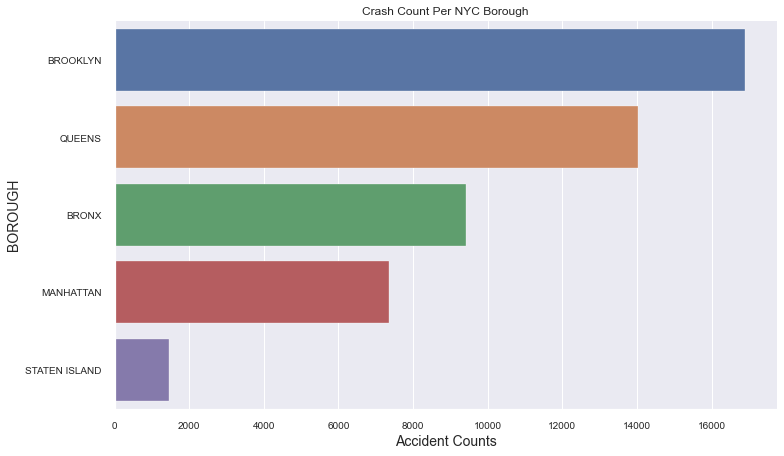

In [41]:
sns.catplot(data = borough,x = 'Accident Counts',y = 'BOROUGH',kind = 'bar',height=6.5,aspect=1.7)
plt.xlabel("Accident Counts", size=14)
plt.ylabel("BOROUGH", size=14)
plt.title('Crash Count Per NYC Borough')
plt.tight_layout()
plt.show()

We see that Brooklyn, by far, has the most accidents counts of all the other boroughs, followed by Queens and then the Bronx.

This is somewhat surprising since these places has wider streets compared to Manhattan, but it could mean that people tend to get more reckless as well.

From this information, we can decide where NYPD needs to allocate more safety precautions for drivers.

#### Street & Number of Persons Involved: 


In [42]:
Street_Person=nyc.groupby(['ON STREET NAME']).agg({'NUMBER OF PERSONS INVOLVED':sum}).sort_values('NUMBER OF PERSONS INVOLVED',ascending=False).head(10)
Street_Person.reset_index()

ON STREET NAME  NUMBER OF PERSONS INVOLVED
0                BELT PARKWAY                         690
1          GRAND CENTRAL PKWY                         347
2     MAJOR DEEGAN EXPRESSWAY                         340
3  BROOKLYN QUEENS EXPRESSWAY                         335
4                   FDR DRIVE                         324
5      LONG ISLAND EXPRESSWAY                         284
6            CROSS BRONX EXPY                         251
7              VAN WYCK EXPWY                         249
8                    BROADWAY                         249
9        CROSS ISLAND PARKWAY                         223

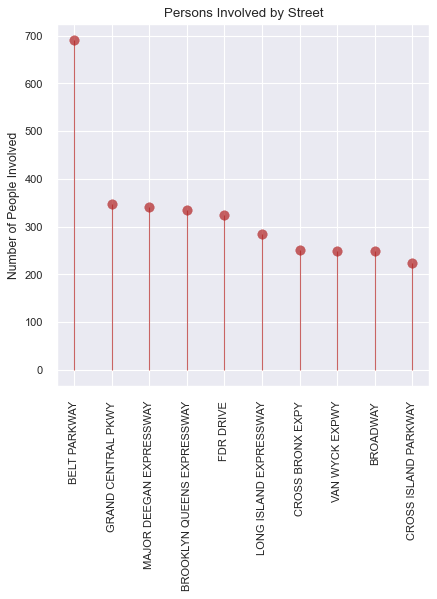

In [43]:
fig, ax = plt.subplots(figsize=(6,6), dpi= 80)
ax.vlines(x=Street_Person.index, ymin=0, ymax=Street_Person['NUMBER OF PERSONS INVOLVED'], color='firebrick', alpha=0.7, linewidth=1)
ax.scatter(x=Street_Person.index, y=Street_Person['NUMBER OF PERSONS INVOLVED'], s=75, color='firebrick', alpha=0.7)
ax.set(title='Persons Involved by Street')
ax.set_ylabel('Number of People Involved')
ax.set_xticks(Street_Person.index)
plt.xticks(rotation=90);

The chart below shows that number of crashes that occurred in streets in NYC, and Belt Parkway is the street with the most accidents each day. So we can tell it is the most dangerous road for traffic but not only beacause there was a specific accident that involved a lot of people, such as can be seen in the graph above.

In [44]:
num_crash=nyc.groupby(['ON STREET NAME']).agg({'CRASH DATE':'count'})
num_crash=num_crash.rename(columns={'CRASH DATE': 'NUMBER OF CRASH'})
num_crash.reset_index().sort_values('NUMBER OF CRASH',ascending=False).head(1)

ON STREET NAME  NUMBER OF CRASH
942   BELT PARKWAY             1241

####  Location with the Most Accidents:

In [45]:
# Count the number of accidents that happened at each location
nyc['LOCATION'].value_counts()

POINT (-73.91282 40.861862)    80
POINT (0 0)                    63
POINT (-73.89083 40.820305)    41
POINT (-73.91243 40.8047)      40
POINT (-73.86536 40.651863)    38
                               ..
POINT (-73.86889 40.662727)     1
POINT (-73.95636 40.70251)      1
POINT (-73.80287 40.690437)     1
POINT (-73.882576 40.85361)     1
POINT (-73.80083 40.58708)      1
Name: LOCATION, Length: 36749, dtype: int64

In [46]:
# Show all the accidents that happened on POINT (-73.91282 40.861862)
nyc_a=nyc[nyc['LOCATION']=='POINT (-73.91282 40.861862)']
nyc_a.head(3)

CRASH DATE CRASH TIME BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
DATE                                                                        
2020-08-29  2020-08-29   12:29:00   BRONX   10453.0  40.861862  -73.91282   
2020-08-27  2020-08-27   17:05:00   BRONX   10453.0  40.861862  -73.91282   
2020-08-26  2020-08-26   11:00:00   BRONX   10453.0  40.861862  -73.91282   

                               LOCATION     ON STREET NAME  \
DATE                                                         
2020-08-29  POINT (-73.91282 40.861862)  WEST FORDHAM ROAD   
2020-08-27  POINT (-73.91282 40.861862)  WEST FORDHAM ROAD   
2020-08-26  POINT (-73.91282 40.861862)  WEST FORDHAM ROAD   

                  CROSS STREET NAME OFF STREET NAME  ...  VEHICLE TYPE CODE 3  \
DATE                                                 ...                        
2020-08-29  MAJOR DEEGAN EXPRESSWAY             NaN  ...                  NaN   
2020-08-27  MAJOR DEEGAN EXPRESSWAY             NaN  ...                  NaN   
2020-08-26  MAJOR DEEGAN EXPRESSWAY             NaN  ...                  NaN   

            VEHICLE TYPE CODE 4  VEHICLE TYPE CODE 5  DAY OF THE WEEK  \
DATE                                                                    
2020-08-29                  NaN                  NaN         Saturday   
2020-08-27                  NaN                  NaN         Thursday   
2020-08-26                  NaN                  NaN        Wednesday   

            WEEKEND  NUMBER OF PERSONS INVOLVED  TOTAL DEATH  TOTAL INJURED  \
DATE                                                                          
2020-08-29        1                           2            0              4   
2020-08-27        0                           1            0              2   
2020-08-26        0                           2            0              4   

           Hour Month  
DATE                   
2020-08-29   12     8  
2020-08-27   17     8  
2020-08-26   11     8  

[3 rows x 36 columns]

In [47]:
print(nyc_a['ON STREET NAME'].unique())
print(nyc_a['CROSS STREET NAME'].unique())

['WEST FORDHAM ROAD' 'MAJOR DEEGAN EXPRESSWAY']
['MAJOR DEEGAN EXPRESSWAY' 'WEST FORDHAM ROAD' nan]


In [48]:
nyc_a2 = nyc_a[['LATITUDE','LONGITUDE']]

In [49]:
# Shows the location on a NYC map:
eq_map = folium.Map(location=[40.861862,-73.91282],tiles='Stamen Terrain',zoom_start=16,min_zoom=2.0)
eq_map.add_child(plugins.HeatMap(nyc_a2))
eq_map

Number of accidents along 'WEST FORDHAM ROAD':

In [50]:
nyc_b=nyc[nyc['ON STREET NAME']=='WEST FORDHAM ROAD']
nyc_b['LATITUDE'].value_counts().head(1)

40.861862    56
Name: LATITUDE, dtype: int64

Number of accidents along 'MAJOR DEEGAN EXPRESSWAY':

In [51]:
nyc_c=nyc[nyc['CROSS STREET NAME']=='MAJOR DEEGAN EXPRESSWAY']
nyc_c['LONGITUDE'].value_counts().head(1)

-73.91282    44
Name: LONGITUDE, dtype: int64

We also wanted to determine which specific location had the most car crashes, and we saw it was at one point on West Fordham Road and Major Deegan Expressway in the Bronx. 

This could be a good insight to have the NYPD look into and see why so many crashes occur there.

### Overview of Accident Types:

What are the most common underlying reasons for accidents around NYC?

In [52]:
nyc_acc = nyc.groupby(['CONTRIBUTING FACTOR VEHICLE 1'], as_index= False).agg(COUNT= ('CONTRIBUTING FACTOR VEHICLE 1', 'count'))
nyc_acc = nyc_acc.sort_values('COUNT', ascending=False)
nyc_acc = nyc_acc.head()
nyc_acc

CONTRIBUTING FACTOR VEHICLE 1  COUNT
50                     Unspecified  19471
8   Driver Inattention/Distraction  19123
17           Following Too Closely   5202
14   Failure to Yield Right-of-Way   4815
32  Passing or Lane Usage Improper   2840

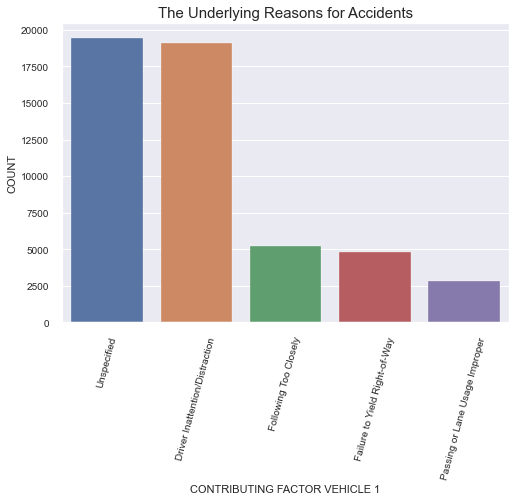

In [53]:
sns.barplot(x = 'CONTRIBUTING FACTOR VEHICLE 1' , y = 'COUNT', data=nyc_acc)
plt.title('The Underlying Reasons for Accidents', fontsize=15)
plt.xticks(rotation=75);

As can be seen, the main known reason of car accidents in New York City is Driver Inattention/Distraction.

In [54]:
nyc_acc2 = nyc.groupby(['CONTRIBUTING FACTOR VEHICLE 2'], as_index= False).agg(COUNT= ('CONTRIBUTING FACTOR VEHICLE 2', 'count'))
nyc_acc2 = nyc_acc2.sort_values('COUNT', ascending=False)
nyc_acc2 = nyc_acc2.head()
nyc_acc2

CONTRIBUTING FACTOR VEHICLE 2  COUNT
42                     Unspecified  49850
6   Driver Inattention/Distraction   3815
14           Following Too Closely    926
23                 Other Vehicular    905
28  Passing or Lane Usage Improper    556

As we move on to accidents involving more than one vehicle, the reasons become more unknown. However, Driver Inattention/Distraction is still the reason for a major chunk of those.

In [55]:
nyc_acc3 = nyc.groupby(['CONTRIBUTING FACTOR VEHICLE 3'], as_index= False).agg(COUNT= ('CONTRIBUTING FACTOR VEHICLE 3', 'count'))
nyc_acc3 = nyc_acc3.sort_values('COUNT', ascending=False)
nyc_acc3 = nyc_acc3.head()

nyc_acc4 = nyc.groupby(['CONTRIBUTING FACTOR VEHICLE 4'], as_index= False).agg(COUNT= ('CONTRIBUTING FACTOR VEHICLE 4', 'count'))
nyc_acc4 = nyc_acc4.sort_values('COUNT', ascending=False)
nyc_acc4 = nyc_acc4.head()

display(nyc_acc3, nyc_acc4)

CONTRIBUTING FACTOR VEHICLE 3  COUNT
27                     Unspecified   6323
13                 Other Vehicular    133
9            Following Too Closely    117
4   Driver Inattention/Distraction    100
20  Reaction to Uninvolved Vehicle     16

CONTRIBUTING FACTOR VEHICLE 4  COUNT
11                     Unspecified   1751
5                  Other Vehicular     46
4            Following Too Closely     22
3   Driver Inattention/Distraction     19
8                Pavement Slippery      3

With car accidents involving more vehicles, many of the reasons for the accidents are because of the surrounding vehicles being too close, especially in a crowded city like New York.

#### The Accident Reasons that Resulted in Most People Injured:

In [56]:
Injured_Count = nyc.groupby('CONTRIBUTING FACTOR VEHICLE 1')['TOTAL INJURED'].sum().reset_index().sort_values(by='TOTAL INJURED',ascending=False).head(10)
Injured_Count

CONTRIBUTING FACTOR VEHICLE 1  TOTAL INJURED
8   Driver Inattention/Distraction          14730
50                     Unspecified          10594
14   Failure to Yield Right-of-Way           5608
17           Following Too Closely           4344
49                    Unsafe Speed           2782
46     Traffic Control Disregarded           2328
27                 Other Vehicular           1502
32  Passing or Lane Usage Improper           1378
48            Unsafe Lane Changing           1088
38  Reaction to Uninvolved Vehicle           1062

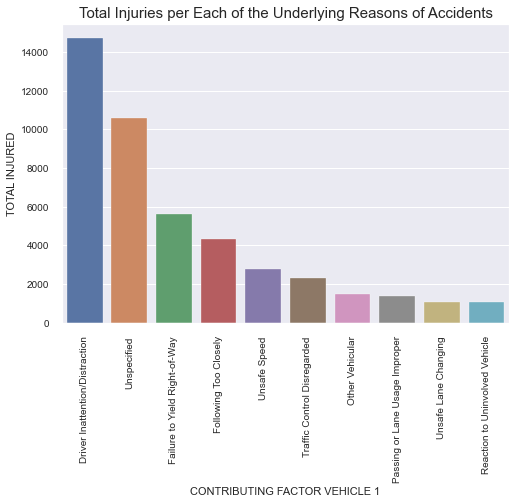

In [57]:
sns.barplot(x = Injured_Count['CONTRIBUTING FACTOR VEHICLE 1'] , y= Injured_Count['TOTAL INJURED'], data=nyc)
plt.title('Total Injuries per Each of the Underlying Reasons of Accidents', fontsize=15)
plt.xticks(rotation=90);

The accident reason that caused most injuries of people involved is Driver Inattention/Distraction.

#### The Accident Reasons that Resulted in Most People Killed:

In [58]:
Death_Count = nyc.groupby('CONTRIBUTING FACTOR VEHICLE 1')['TOTAL DEATH'].sum().reset_index().sort_values(by='TOTAL DEATH',ascending=False).head(10)
Death_Count

CONTRIBUTING FACTOR VEHICLE 1  TOTAL DEATH
50                                        Unspecified           57
49                                       Unsafe Speed           44
8                      Driver Inattention/Distraction           19
46                        Traffic Control Disregarded           19
14                      Failure to Yield Right-of-Way           16
35  Pedestrian/Bicyclist/Other Pedestrian Error/Co...            8
53                            View Obstructed/Limited            6
20                                             Illnes            6
9                                 Driver Inexperience            6
4                                    Backing Unsafely            5

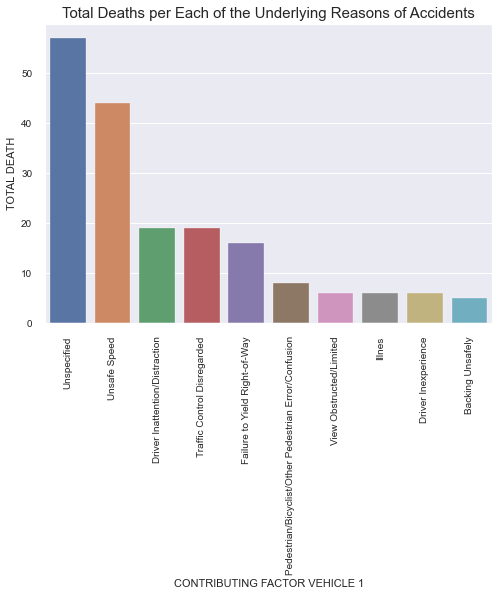

In [59]:
sns.barplot(x = Death_Count['CONTRIBUTING FACTOR VEHICLE 1'] , y= Death_Count['TOTAL DEATH'], data=nyc)
plt.title('Total Deaths per Each of the Underlying Reasons of Accidents', fontsize=15)
plt.xticks(rotation=90);

The accident reason that caused most deaths of people involved is, unsurprisingly, Unsafe Speed.

## Conclusion:


In conclusion, we can see that there are many factors to consider for the reasons behind car accidents in New York City:



*   **Location**: Certain locations in NYC have had car crashed occur there than others, such as in the boroughs of Brooklyn and the Bronx in comparison to Manhattan and Staten Island. Also, certain highways, such as Belt Parkway, have more crashes occuring there than other streets.
*   **Time & Date**: More crashes occur during the afernoon than any other time, mainly after work hours. Also, Saturdays, Fridays and Thursdays have the highest number of crashes during the week, which makes sense since that it is when most people go out.
*   **Reason of Accident**: The most common reason the main vehicle got into an accident was becuase of Driver Inattention/Distraction, and the one that lead to most death was Unsafe Speed.
*   **Vehicle Type**: Generally, the top two types of cars that got into accidents were sedans and station wagons, which are vehicles that are mostly commercially used. So, we can see that people who get into most accidents are mainly civilians.


In the end, we can recommned to the NYPD to focus more of their attention in certain areas of the city and during certain times of the day in order to better avoid car accidents. Also, it could be useful to find out the reason why certain streets and areas have more accidents, maybe create more safety measures in those areas that would help lessen the possibility of a crash.

Given that our data was of 2020, when COVID-19 hit, it really affected our data and showed us unusual trends that would not usually be there, and so more analysis is needed to better understand the trend of car crashes in New York City.




## Future Steps and Insights:


There are many ways that we can use the observations we obtained from our analysis to better help the NYPD improve transportation safety in the city. 

A few suggestions for the future that can be done with our analysis are:


*   Combining our analysis of the dataset with a weather dataset to see what weather factors affect accidents the most.
*   Combining it with bikeshare data to understand how many cyclists involved in accidents were using personal bikes or bikeshare bikes, and to see if there is a way to increase safety in that sense.

Both of the recommendations would help New York's Police Department understand where to improve safety measures to reduce car accidents throughout the city.



## References: 


Matplotlib visualization ideas: 
https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

Adding a legend outside the plot :
https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot


Adding a row in an existing pandas dataframe:
https://www.geeksforgeeks.org/how-to-add-one-row-in-an-existing-pandas-dataframe/


